In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import zipfile
import os
from tensorflow.keras import callbacks

In [3]:
zip_path = "C:/Users/maila/Downloads/A,B,CNNS_with_Tim.zip" 
extract_path = "C:/Users/maila/Downloads/A,B,CNN_Dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete!")

Extraction Complete!


In [5]:
train_dataset_path = os.path.join(extract_path, "C:/Users/maila/Downloads/A,B,CNN_Dataset/A,B,CNNS_with_Tim/veggie_heap_training")
test_dataset_path = os.path.join(extract_path, "C:/Users/maila/Downloads/A,B,CNN_Dataset/A,B,CNNS_with_Tim/veggie_heap_testing")

# Verify existence
if os.path.exists(train_dataset_path) and os.path.exists(test_dataset_path):
    print(f"Training Dataset Found: {train_dataset_path}")
    print(f"Testing Dataset Found: {test_dataset_path}")
else:
    print("Error: Dataset folders not found!")

Training Dataset Found: C:/Users/maila/Downloads/A,B,CNN_Dataset/A,B,CNNS_with_Tim/veggie_heap_training
Testing Dataset Found: C:/Users/maila/Downloads/A,B,CNN_Dataset/A,B,CNNS_with_Tim/veggie_heap_testing


In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
img_height, img_width = 224, 224
batch_size = 32

# Load datasets with augmentation
train_ds = image_dataset_from_directory(
    train_dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="categorical",
    validation_split=0.2,
    subset="training",
    seed=123
)
val_ds = image_dataset_from_directory(
    train_dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    seed=123
)
test_ds = image_dataset_from_directory(
    test_dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="categorical"
)
print("Datasets loaded successfully!")
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

Found 9835 files belonging to 12 classes.
Using 7868 files for training.
Found 9835 files belonging to 12 classes.
Using 1967 files for validation.
Found 2424 files belonging to 12 classes.
Datasets loaded successfully!


In [9]:
class_names = train_ds.class_names

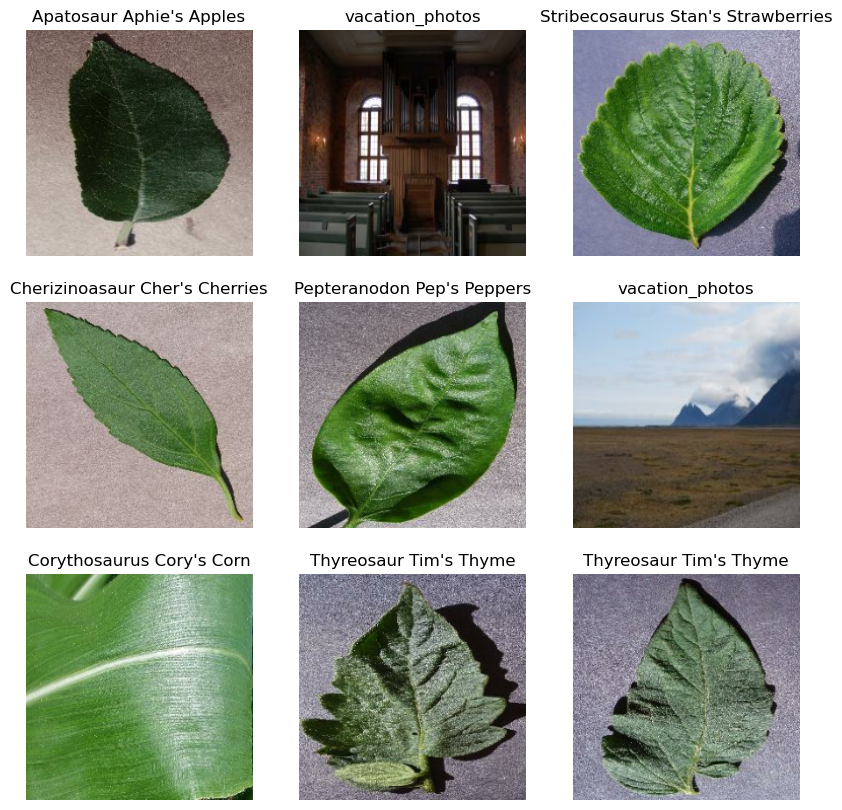

In [11]:
# Take a single batch from the dataset
for images, labels in train_ds.take(1):  
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i].numpy().argmax())])  # Convert one-hot to index
        plt.axis("off")
    plt.show()

In [13]:
print(labels.numpy())  # Debugging: Check label structure

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.

In [15]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_ds.class_names), activation='softmax')
])
# Define learning rate scheduler
initial_lr = 0.001
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
# Compile model
model.compile(optimizer=Adam(learning_rate=initial_lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Early stopping and checkpoint
checkpoint_cb = callbacks.ModelCheckpoint("veggie_classifier.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=2, restore_best_weights=True)

C:\Users\maila\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,236,812 (50.49 MB)

 Trainable params: 13,236,812 (50.49 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
epochs = 20 
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler])

Epoch 1/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.3935 - loss: 1.7801

246/246 ━━━━━━━━━━━━━━━━━━━━ 249s 993ms/step - accuracy: 0.3943 - loss: 1.7780 - val_accuracy: 0.8521 - val_loss: 0.4388 - learning_rate: 0.0010
Epoch 2/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.7992 - loss: 0.6068

246/246 ━━━━━━━━━━━━━━━━━━━━ 231s 940ms/step - accuracy: 0.7993 - loss: 0.6067 - val_accuracy: 0.9105 - val_loss: 0.2813 - learning_rate: 0.0010
Epoch 3/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 218s 887ms/step - accuracy: 0.8482 - loss: 0.4738 - val_accuracy: 0.8195 - val_loss: 0.5657 - learning_rate: 0.0010
Epoch 4/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.8798 - loss: 0.3689

246/246 ━━━━━━━━━━━━━━━━━━━━ 221s 899ms/step - accuracy: 0.8798 - loss: 0.3689 - val_accuracy: 0.9370 - val_loss: 0.1931 - learning_rate: 0.0010
Epoch 5/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 259s 885ms/step - accuracy: 0.9030 - loss: 0.3039 - val_accuracy: 0.9283 - val_loss: 0.2273 - learning_rate: 0.0010
Epoch 6/20
246/246 ━━━━━━━━━━━━━━━━━━━━ 218s 887ms/step - accuracy: 0.9103 - loss: 0.2914 - val_accuracy: 0.8790 - val_loss: 0.3627 - learning_rate: 0.0010


In [35]:
class_names = train_ds.class_names
print("Class Names:", class_names)

Class Names: ["Apatosaur Aphie's Apples", "Bluplocephalus Bob's Blueberries", "Cherizinoasaur Cher's Cherries", "Corythosaurus Cory's Corn", "Grapthorina Greta's Grapes", "Pachycephalosaurus Perry's Peaches", "Pepteranodon Pep's Peppers", "Potoceratops Pott's Potatoes", "Rhaspdodon Ribery's Raspberries", "Stribecosaurus Stan's Strawberries", "Thyreosaur Tim's Thyme", 'vacation_photos']


In [19]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.6172 - loss: 2.5215
Test Loss: 2.5454
Test Accuracy: 0.6180


In [42]:
print("Accuracy :",test_acc*100, "%")
print("Test loss:",test_loss)

Accuracy : 61.7986798286438 %
Test loss: 2.5453813076019287


76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step


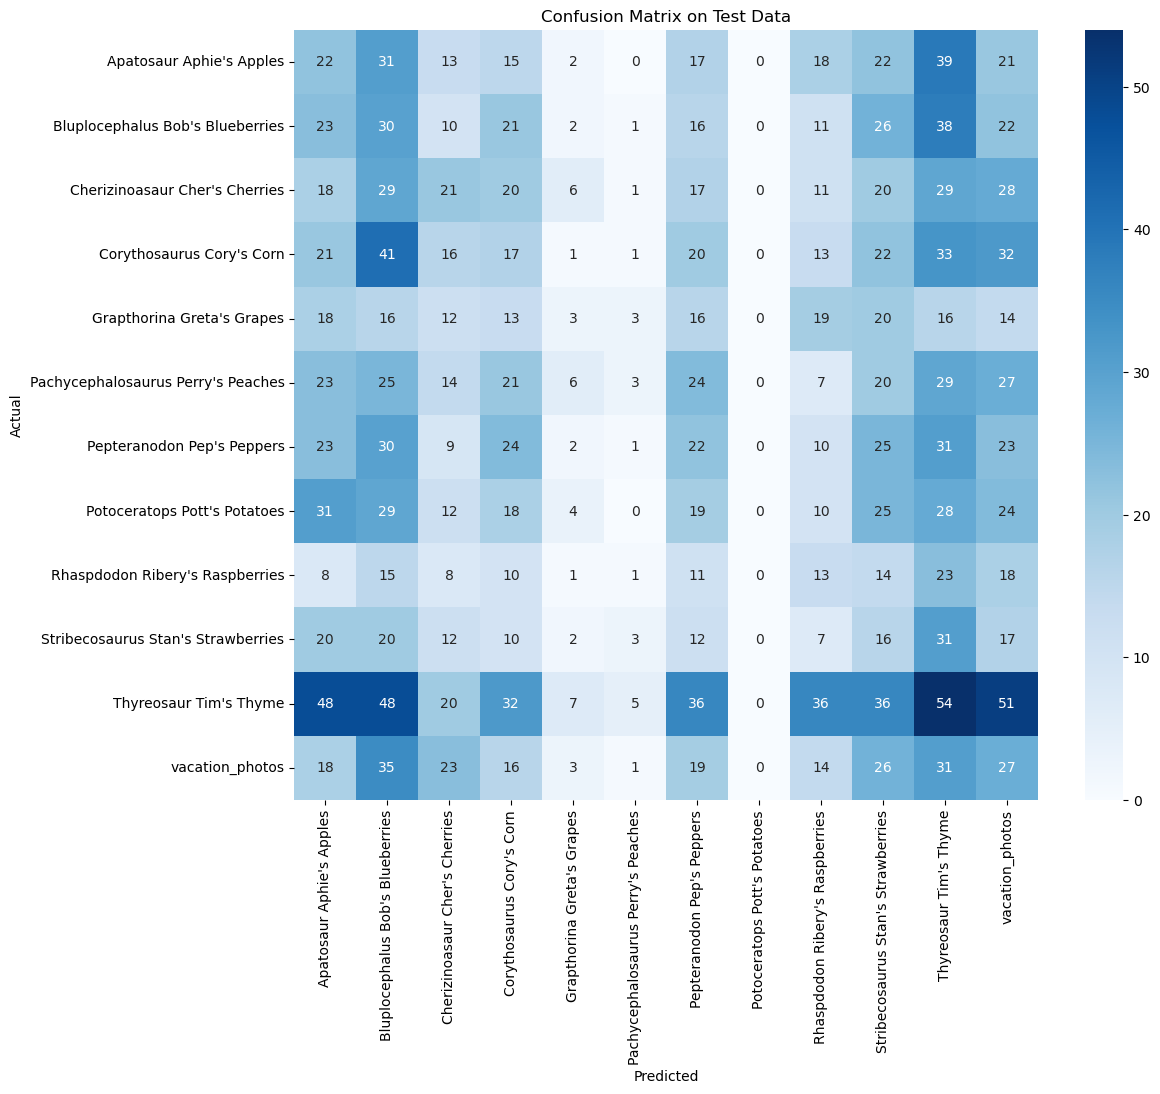

In [23]:
# 1. Get true labels and predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_true, axis=1)

# 2. Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 3. Plot
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Data")
plt.show()

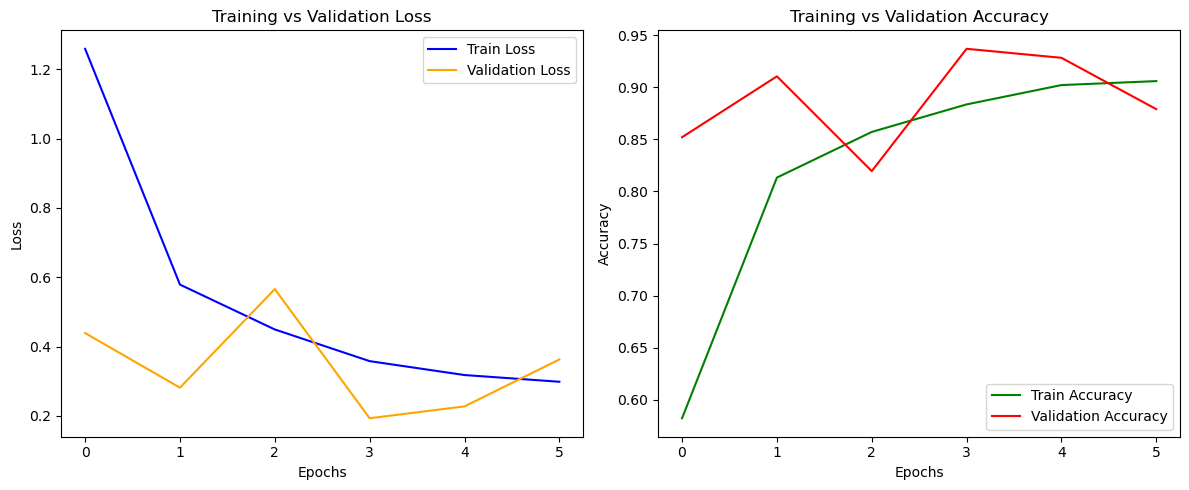

In [36]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

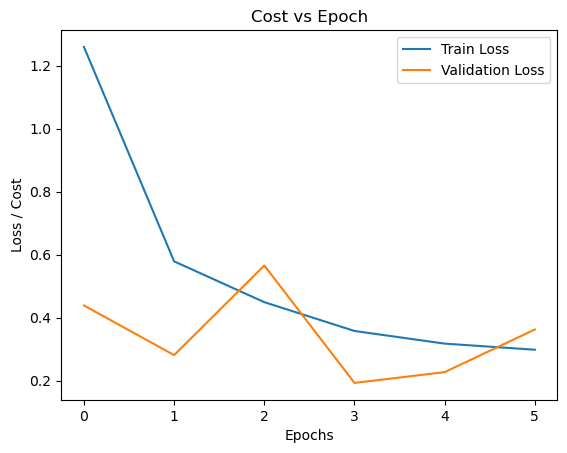

In [38]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss / Cost')
plt.title('Cost vs Epoch')
plt.legend()
plt.show()